loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Categories ['otters', 'otter']
Total: 2
otters has 0 images
otter has 50 images


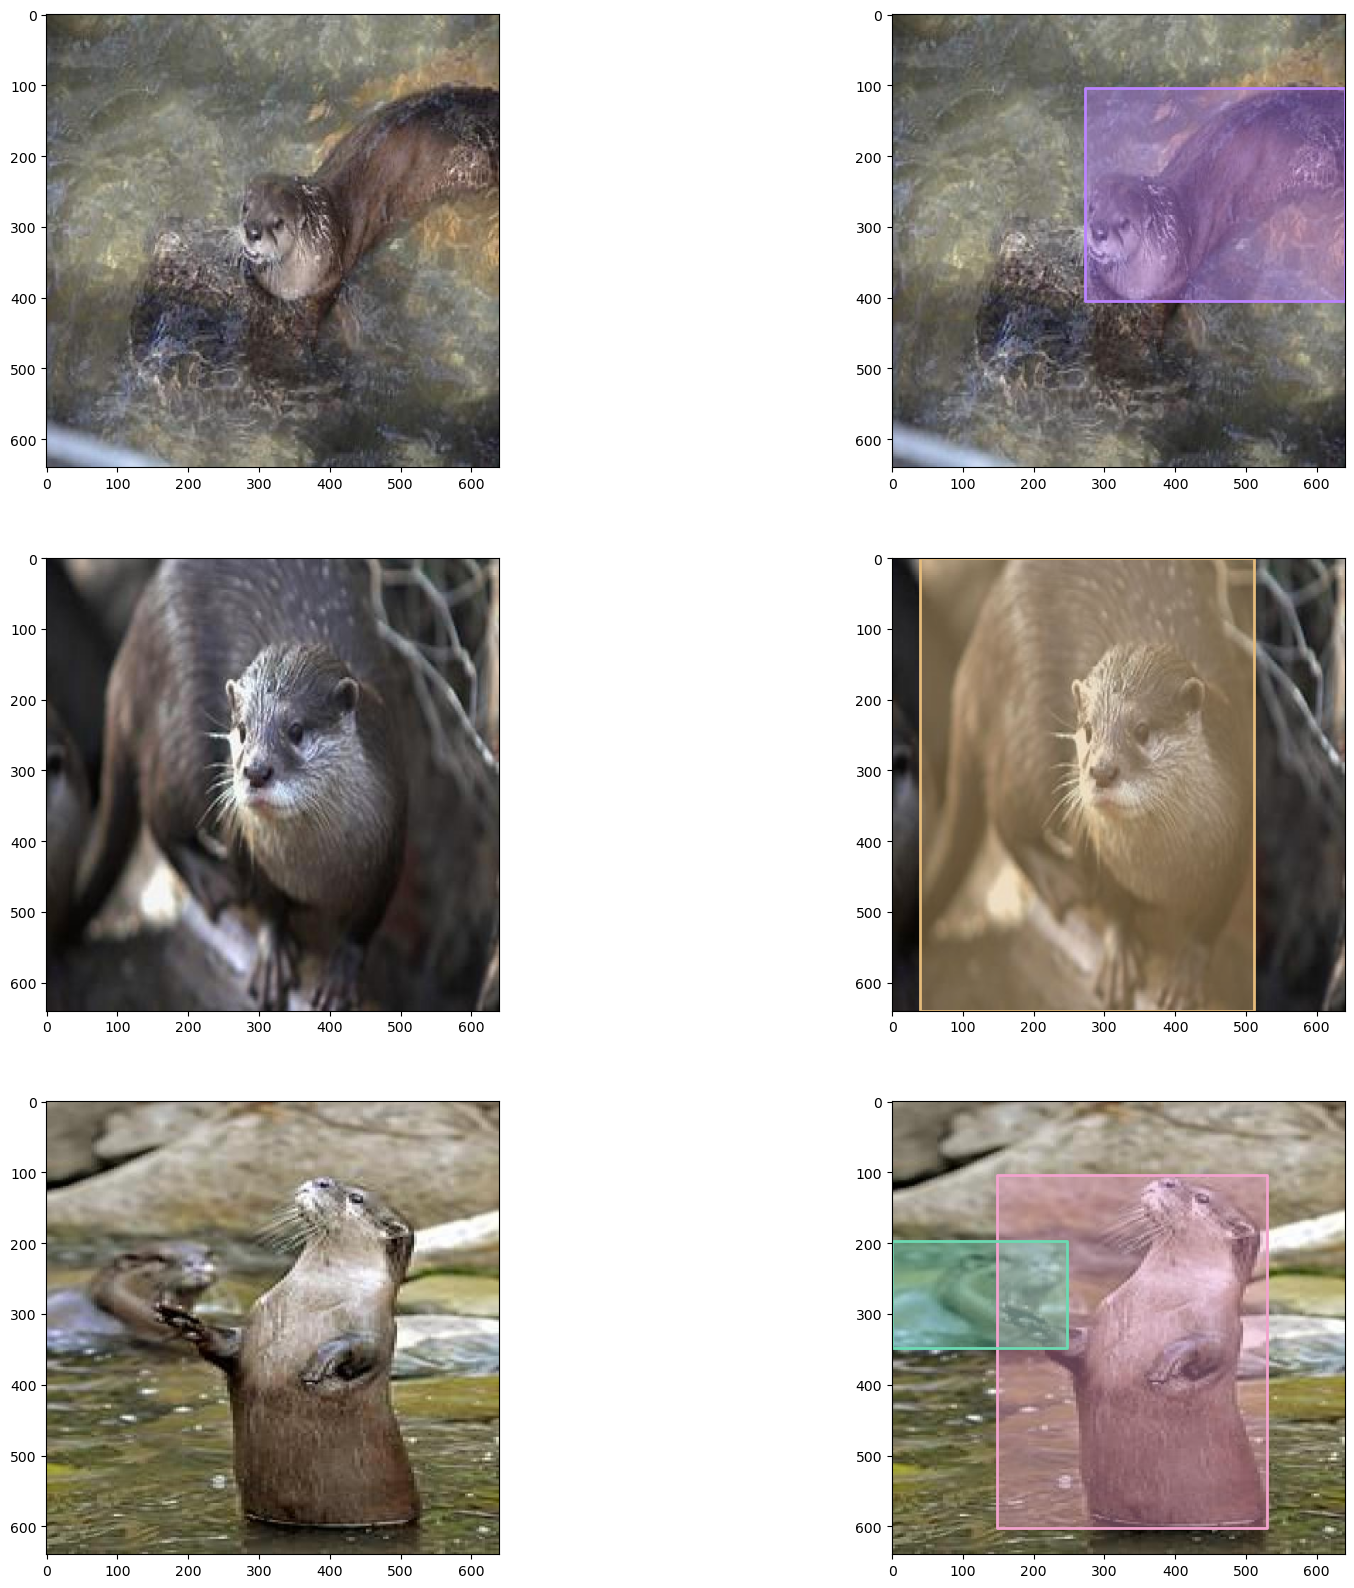

In [7]:
import pandas as pd
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

images_path = Path('data/otters/train')
coco_file = images_path/'_annotations.coco.json'

dataset = COCO(coco_file)
categories = dataset.loadCats(dataset.getCatIds())
annotations = dataset.loadAnns(dataset.getAnnIds())

print(f"Categories {[c['name'] for c in categories]}")
print(f"Total: {len(categories)}")

image_cats = [i['category_id'] for i in annotations]
for cat in categories:
    print(f"{cat['name']} has {image_cats.count(cat['id'])} images")

images = dataset.loadImgs(dataset.getImgIds()[2:5])
_, axs = plt.subplots(len(images), 2, figsize=(20, 20))
for img, ax in zip(images, axs):
    I = io.imread(images_path/img['file_name'])
    annIds = dataset.getAnnIds(imgIds=[img['id']])
    anns = dataset.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    dataset.showAnns(anns, draw_bbox=True)